In [21]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
df = web.DataReader('MSFT', data_source = 'yahoo', start = '2012-01-01', end = '2021-05-01')


In [23]:
df.shape

(2347, 6)

Text(0, 0.5, 'Price in USD')

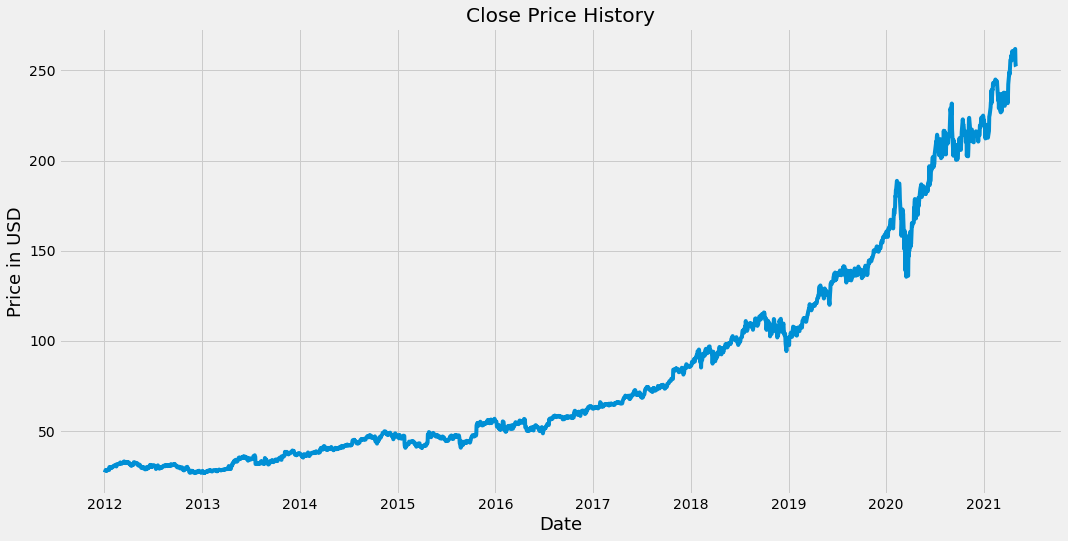

In [24]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot()
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price in USD', fontsize = 18)


In [25]:
data_close = df.filter(['Close'])
dataset = data_close.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1878

In [26]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00169779],
       [0.00437181],
       [0.00556027],
       ...,
       [0.96854837],
       [0.95984717],
       [0.95844648]])

In [27]:
# Create training data
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0 ])
    y_train.append(train_data[i, 0])
    if i <= 120:
        print(x_train)
        print(y_train)
        print()

[array([0.00169779, 0.00437181, 0.00556027, 0.0073854 , 0.00581494,
       0.00623939, 0.00573004, 0.0069185 , 0.00797962, 0.00802207,
       0.00789473, 0.00742784, 0.01417656, 0.01426145, 0.01260611,
       0.01353989, 0.01328523, 0.01213921, 0.01375212, 0.01341256,
       0.01494057, 0.01519525, 0.01642614, 0.01625637, 0.01689304,
       0.01820882, 0.01867572, 0.01752971, 0.01786927, 0.01646859,
       0.01561969, 0.02088285, 0.02071307, 0.02151952, 0.02079796,
       0.02122241, 0.0216893 , 0.02113752, 0.02334465, 0.02279286,
       0.02512733, 0.024236  , 0.02304753, 0.02202886, 0.02321731,
       0.02393887, 0.02385399, 0.02406621, 0.02674023, 0.02716468,
       0.02750423, 0.02644311, 0.02474533, 0.02385399, 0.02351443,
       0.02389643, 0.02393887, 0.02640068, 0.02610356, 0.02470288,
       0.02440576, 0.02499999, 0.02512733, 0.02364176, 0.02054329,
       0.02185908, 0.0200764 , 0.01740237, 0.01689304, 0.01956706,
       0.01884549, 0.01999151, 0.02151952, 0.02024617, 0.0196

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [29]:
#Build LSTM
# https://keras.io/api/models/sequential/
model = Sequential()
# Add layer to model with 50 neurons 
# first LSTM layer
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1], 1)))
# second LSTM layer
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [31]:
#Train model
# fit model with only 1 epochs otherwise it will run into overfitting model
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

Epoch 1/1
1758/1758 [==============================] - 125s 71ms/step - loss: 4.3304e-04


In [32]:
# Create testing data set
test_data = scaled_data[training_data_len - 120: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])

In [33]:
x_test = np.array(x_test)


In [34]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [35]:
#Get model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [36]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

11.149521004162363

F:\Miniconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


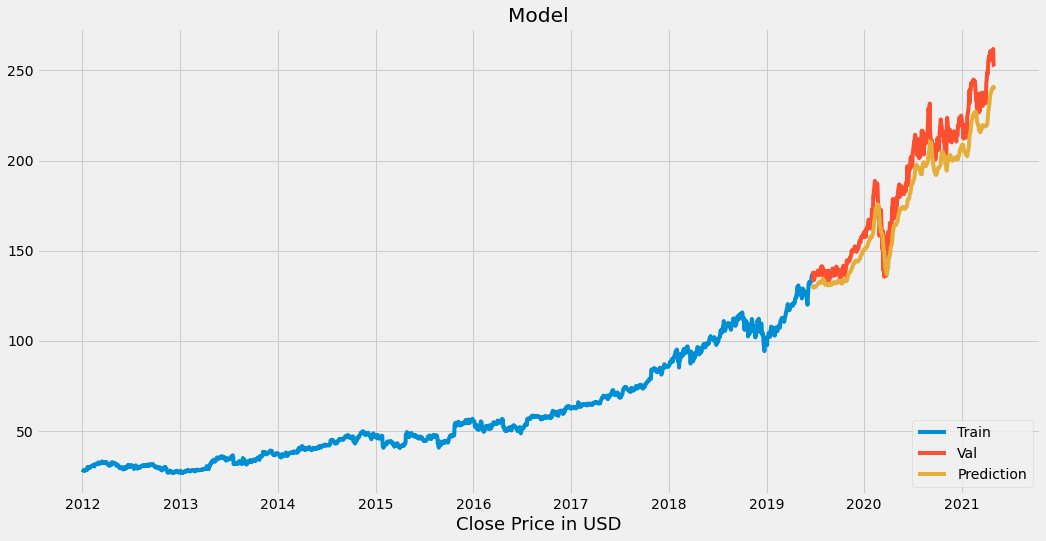

In [37]:
# Plot Data
train = data_close[:training_data_len]
valid = data_close[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.xlabel('Close Price in USD', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc = 'lower right')
plt.show()


In [38]:
valid

,Close,Predictions
Date,,
2019-06-21,136.970001,128.657776
2019-06-24,137.779999,129.395599
2019-06-25,133.429993,130.105988
2019-06-26,133.929993,130.218201
2019-06-27,134.149994,130.093353
...,...,...
2021-04-26,261.549988,240.072250
2021-04-27,261.970001,240.508087
2021-04-28,254.559998,240.983414


In [39]:
# Get quote

msft_quote = web.DataReader('MSFT', data_source = 'yahoo', start = '2012-01-01', end = '2021-05-01')
new_df = msft_quote.filter(['Close'])
last_120 = new_df[-120:].values
last_120_scaled = scaler.transform(last_120)
X_test = []
X_test.append(last_120_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_price = model.predict(X_test)
predict_price = scaler.inverse_transform(predict_price)
print(predict_price)


[[238.51968]]


In [40]:
msft_quote2 = web.DataReader('MSFT', data_source = 'yahoo', start = '2021-02-07', end = '2021-05-02')
print(msft_quote2['Close'])

Date
2021-02-08    242.470001
2021-02-09    243.770004
2021-02-10    242.820007
2021-02-11    244.490005
2021-02-12    244.990005
2021-02-16    243.699997
2021-02-17    244.199997
2021-02-18    243.789993
2021-02-19    240.970001
2021-02-22    234.509995
2021-02-23    233.270004
2021-02-24    234.550003
2021-02-25    228.990005
2021-02-26    232.380005
2021-03-01    236.940002
2021-03-02    233.869995
2021-03-03    227.559998
2021-03-04    226.729996
2021-03-05    231.600006
2021-03-08    227.389999
2021-03-09    233.779999
2021-03-10    232.419998
2021-03-11    237.130005
2021-03-12    235.750000
2021-03-15    234.809998
2021-03-16    237.710007
2021-03-17    237.039993
2021-03-18    230.720001
2021-03-19    230.350006
2021-03-22    235.990005
2021-03-23    237.580002
2021-03-24    235.460007
2021-03-25    232.339996
2021-03-26    236.479996
2021-03-29    235.240005
2021-03-30    231.850006
2021-03-31    235.770004
2021-04-01    242.350006
2021-04-05    249.070007
2021-04-06    247.86